In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, BatchNormalization

import random
import pickle
import cv2
import matplotlib

In [4]:
train_x = np.load("/gdrive/MyDrive/new_augx.npy")

In [5]:
print(train_x.shape)

(332, 512, 512, 3)


In [6]:
model = Sequential()

model.add(Input(shape=(512, 512, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2), padding="same"))

model.add(Dense(2))

model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")) # upsampling & convolution
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(Conv2D(3, (1, 1), activation="sigmoid", padding="same"))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["mae"])

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=50)  
hist = model.fit(train_x, train_x, epochs=100, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
19/19 [==============================] - 23s 475ms/step - loss: 0.6893 - mae: 0.1637 - val_loss: 0.6875 - val_mae: 0.1527
Epoch 2/100
19/19 [==============================] - 7s 389ms/step - loss: 0.6828 - mae: 0.1559 - val_loss: 0.6773 - val_mae: 0.1409
Epoch 3/100
19/19 [==============================] - 7s 388ms/step - loss: 0.6829 - mae: 0.1567 - val_loss: 0.6748 - val_mae: 0.1397
Epoch 4/100
19/19 [==============================] - 7s 388ms/step - loss: 0.6694 - mae: 0.1403 - val_loss: 0.6681 - val_mae: 0.1297
Epoch 5/100
19/19 [==============================] - 7s 388ms/step - loss: 0.6608 - mae: 0.1287 - val_loss: 0.6634 - val_mae: 0.1240
Epoch 6/100
19/19 [==============================] - 7s 389ms/step - loss: 0.6558 - mae: 0.1216 - val_loss: 0.6586 - val_mae: 0.1168
Epoch 7/100
19/19 [==============================] - 7s 388ms/step - loss: 0.6527 - mae: 0.1171 - val_loss: 0.6566 - val_mae: 0.1144
Epoch 8/100
19/19 [==============================] - 7s 389ms/step -

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 512, 512, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      9248      
                                                        

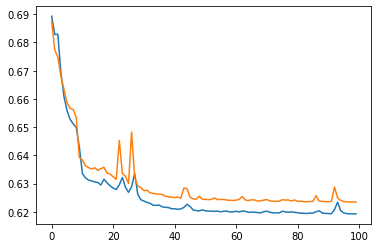

In [8]:
plt.plot(hist.history['loss'][:])
plt.plot(hist.history['val_loss'][:])
plt.show()

In [9]:
reconstructed = model.predict(train_x)

In [10]:
print(reconstructed.shape)

(332, 512, 512, 3)


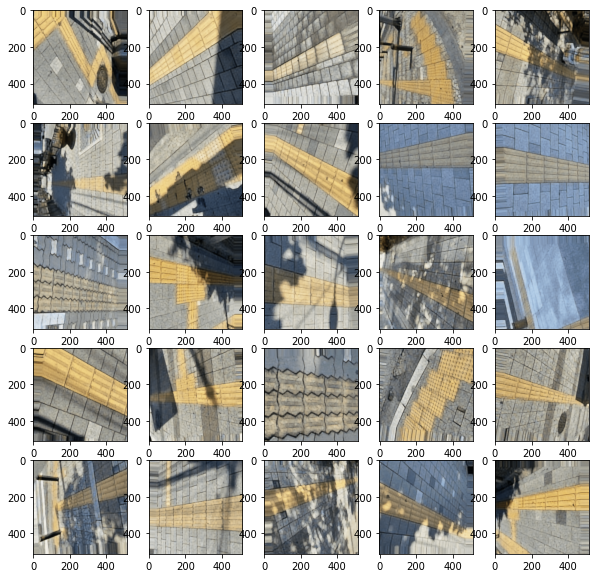

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(reconstructed[i])

plt.show()

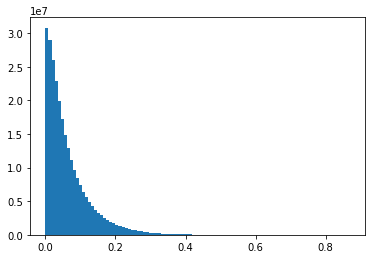

In [12]:
diff = np.abs(reconstructed - train_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

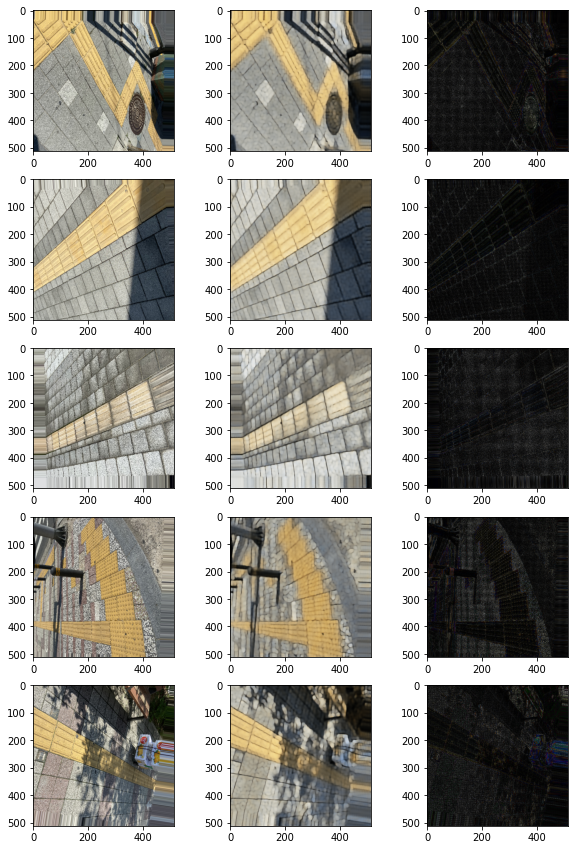

In [13]:
plt.figure(figsize=(10,15))
for i in range(5):
    plt.subplot(5,3,i*3+1)
    plt.imshow(train_x[i])
    plt.subplot(5,3,i*3+2)
    plt.imshow(reconstructed[i])
    plt.subplot(5,3,i*3+3)
    plt.imshow(diff[i])

plt.show()

In [14]:
sorted_diff = np.sort(diff.flatten())
threshold_index = int(len(sorted_diff)*0.999)
threshold = sorted_diff[threshold_index]

print(threshold)

0.41706103


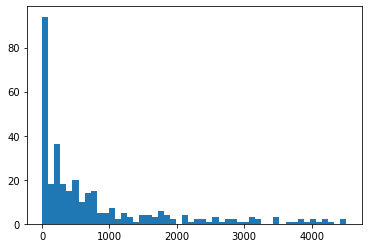

In [15]:
lage_diff_count = (diff>threshold).sum(axis=(1,2,3))
plt.hist(lage_diff_count, bins=50)
plt.show()

In [16]:
import numpy as np
from PIL import Image
img = Image.open("/gdrive/MyDrive/tmp/ttrr.jpg")
test_x = np.array(img)
print(test_x.shape)

(475, 541, 3)


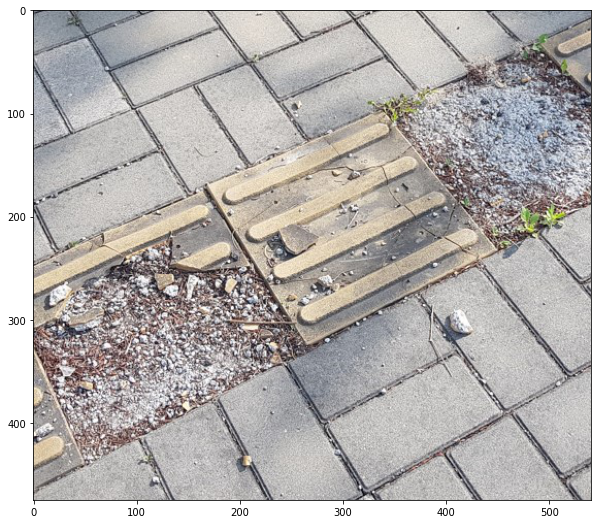

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(test_x)
plt.show()

In [18]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from google.colab.patches import cv2_imshow

In [20]:
img = cv2.imread("/gdrive/MyDrive/tmp/ttrr.jpg")

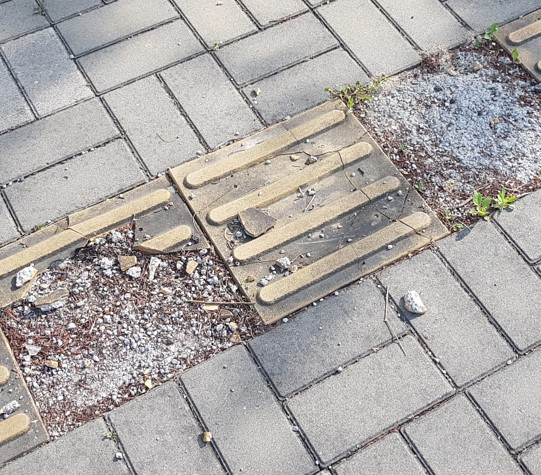

-1

In [21]:
cv2_imshow(img)
cv2.waitKey()

img.shape = (475, 541, 3)
resize_img.shape = (512, 512, 3)


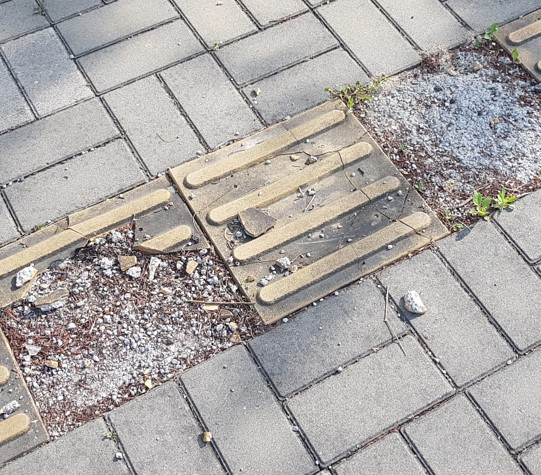

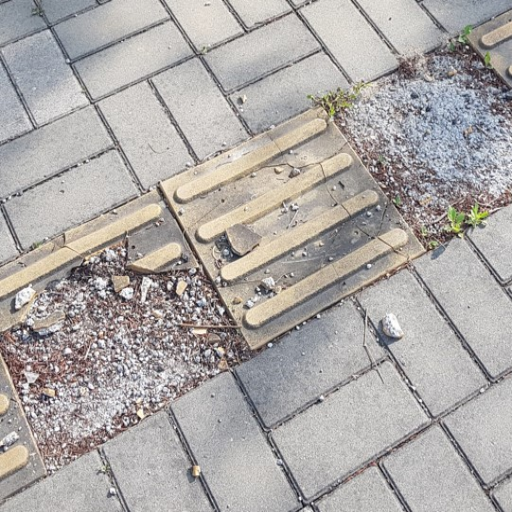

-1

In [22]:
print("img.shape = {0}".format(img.shape))

resize_img = cv2.resize(img, (512, 512))
print("resize_img.shape = {0}".format(resize_img.shape))

cv2_imshow(img)
cv2_imshow(resize_img)
cv2.waitKey()

In [23]:
test_x = np.array(resize_img)/255
print(test_x.shape)
test_x=test_x.reshape(1,512,512,3)
print(test_x.shape)
print(np.max(test_x))

(512, 512, 3)
(1, 512, 512, 3)
1.0


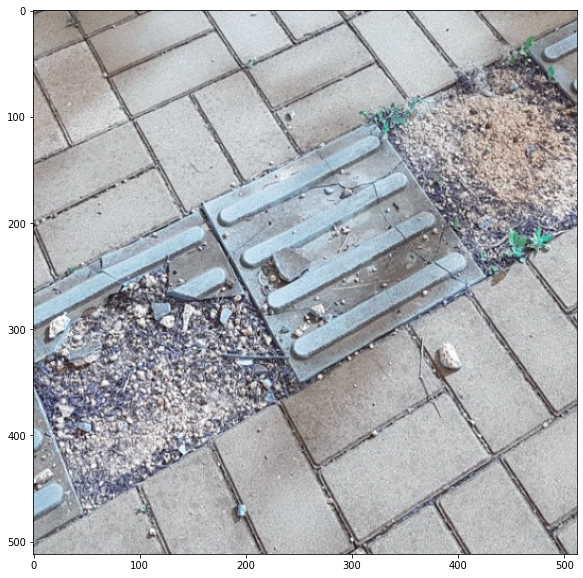

In [24]:
plt.figure(figsize=(10,10))
plt.imshow(test_x[0])
plt.show()

In [25]:
reconstructed = model.predict(test_x)

In [26]:
print(reconstructed.shape)

(1, 512, 512, 3)


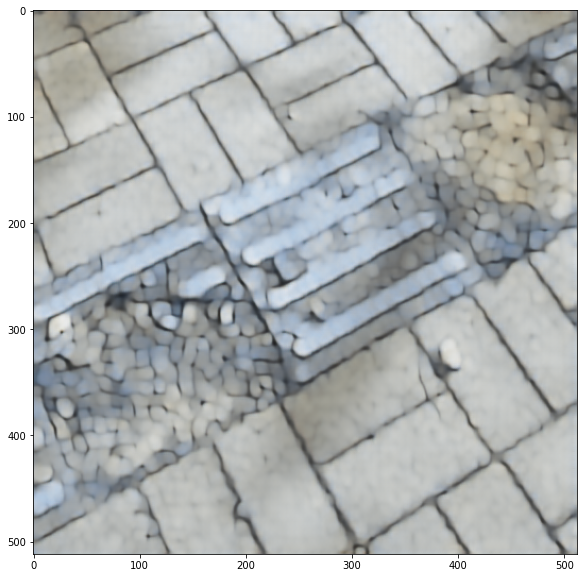

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(reconstructed[0])
plt.show()

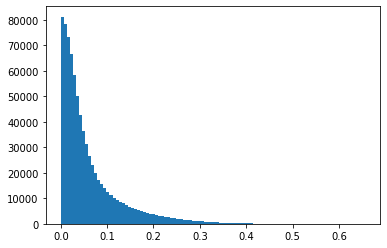

In [30]:
diff = np.abs(reconstructed - test_x)
plt.hist(diff.flatten(), bins=100)
plt.show()

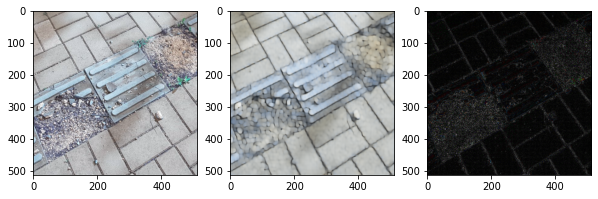

In [34]:
plt.figure(figsize=(10,15))
plt.subplot(1,3,1)
plt.imshow(test_x[0])
plt.subplot(1,3,2)
plt.imshow(reconstructed[0])
plt.subplot(1,3,3)
plt.imshow(diff[0])

plt.show()